In [1]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00


Problem Statement

Ecommerce company in New york city is selling clothing online. They have clothing and in-style advice sessions. Customers visits the store ,have sessions with the stylist and then order their favorite cloths by using app or from website. Yhe company needs to know whether they should focus on orders from website or orders from mobile app.

Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
from pycaret.regression import *

In [4]:
df=pd.read_csv("/content/Ecommerce Customers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Exploratory Data Analysis

In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [9]:
print(f"The Given dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The Given dataset has 500 rows and 8 columns


In [10]:
df['Avatar'].nunique()

138

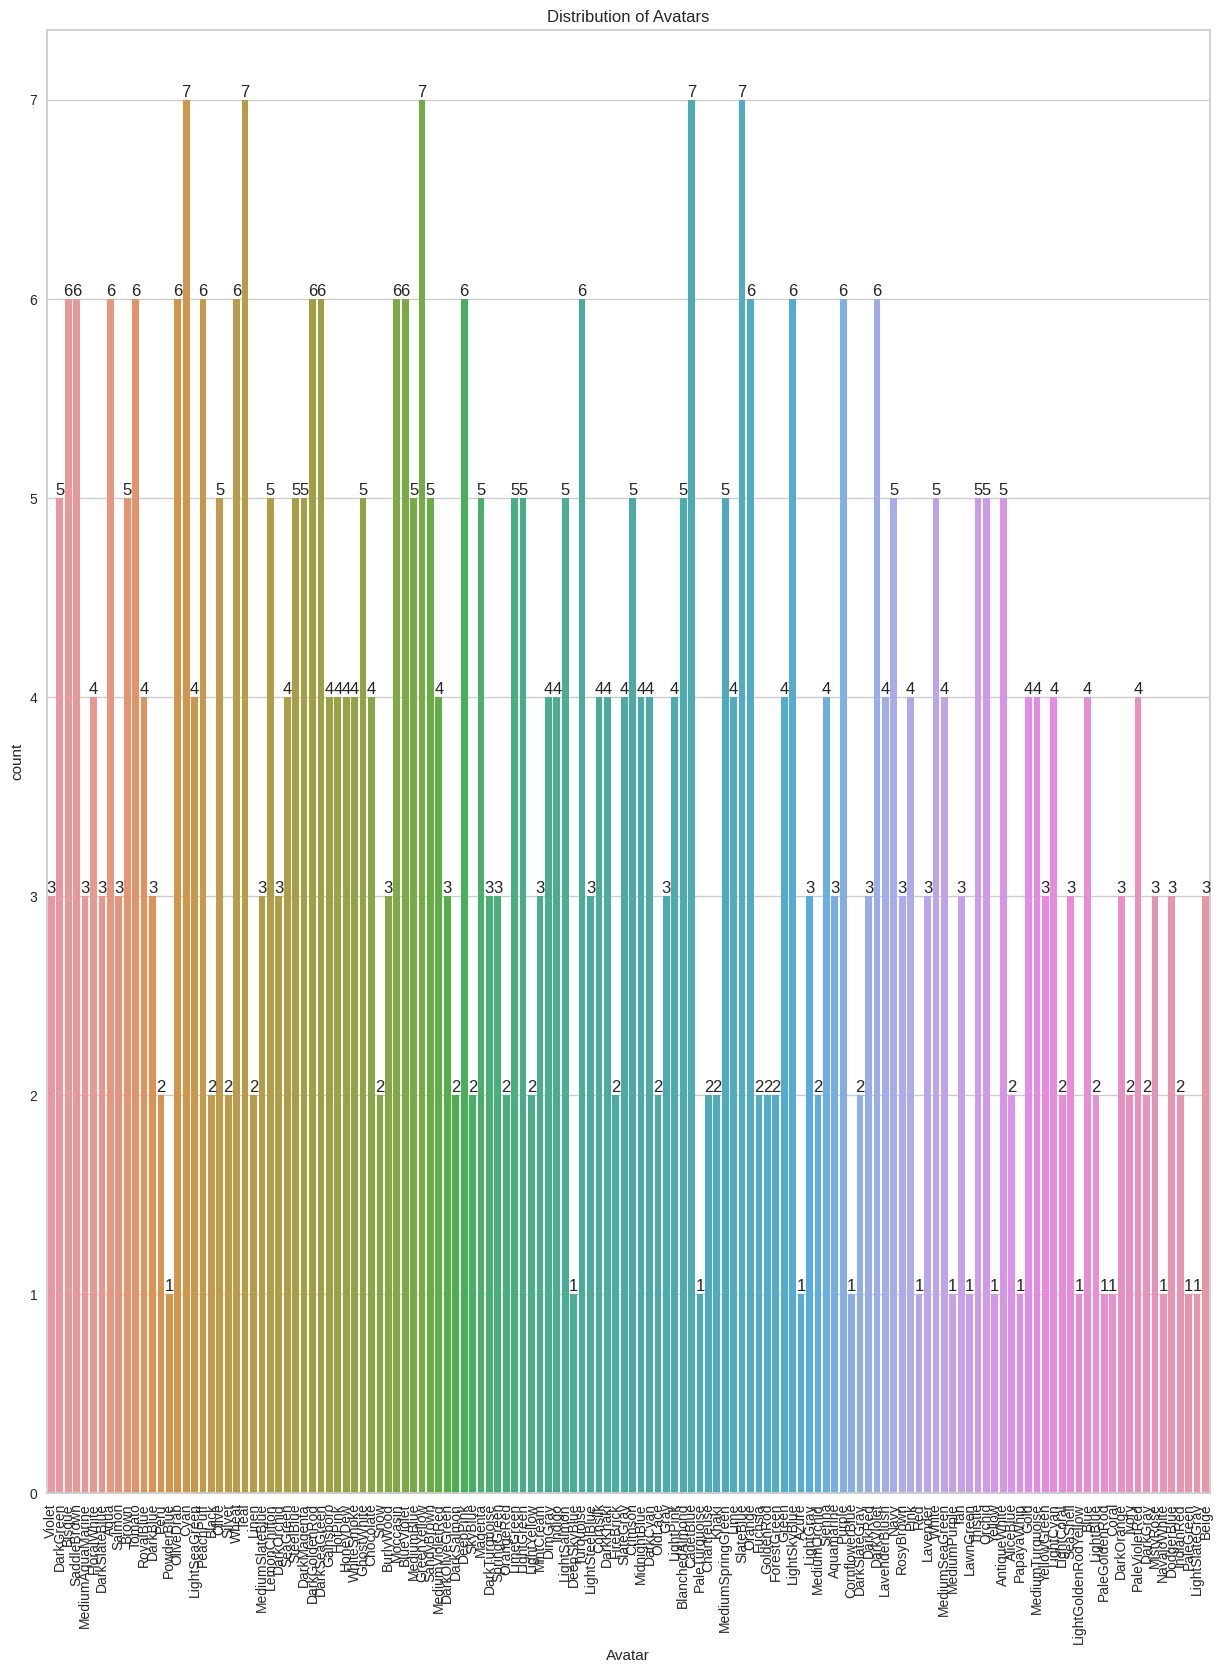

In [11]:
plt.figure(figsize=(15,19))

ax=sns.countplot(x=df["Avatar"]);
ax.bar_label(ax.containers[0]);
plt.xticks(rotation=90)
plt.title("Distribution of Avatars")
plt.show()

In [12]:
df.drop(columns=['Email','Address'],inplace=True)

# Data Visualization

<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

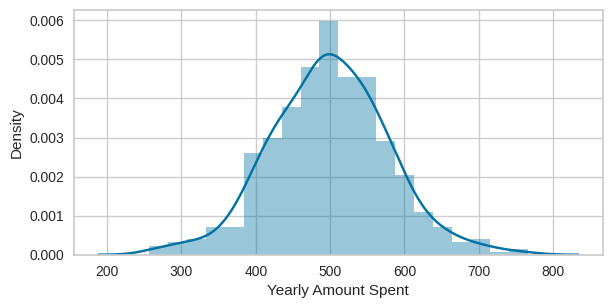

In [13]:
plt.figure(figsize=(15,7))

plt.subplot(2,2,1)
sns.distplot(df["Yearly Amount Spent"],hist=True)

<Axes: xlabel='Time on App', ylabel='Density'>

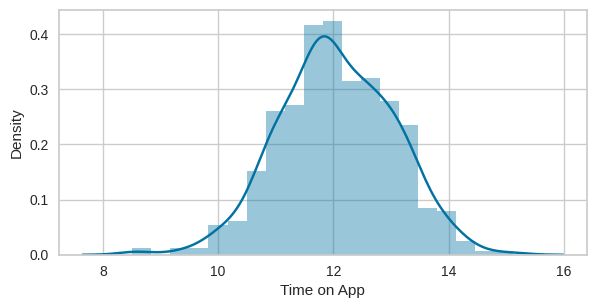

In [15]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,2)
sns.distplot(df['Time on App'],hist=True)

<Axes: xlabel='Length of Membership', ylabel='Density'>

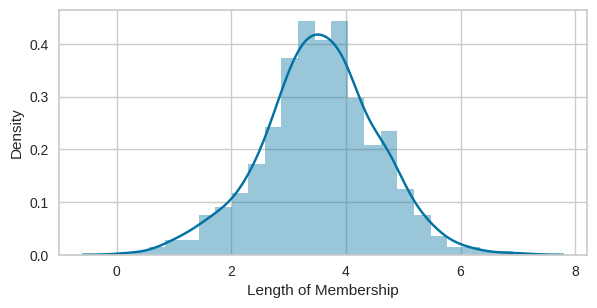

In [17]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,3)
sns.distplot(df['Length of Membership'],hist=True)


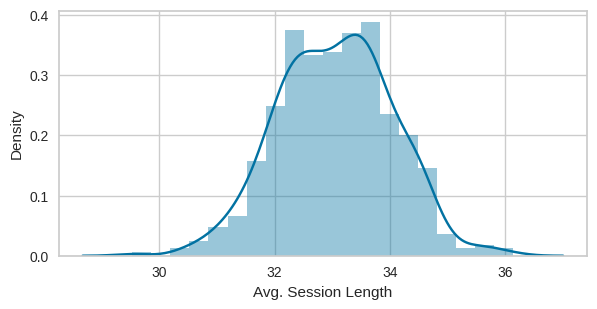

In [18]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,4)
sns.distplot(df['Avg. Session Length'],hist=True)
plt.show()

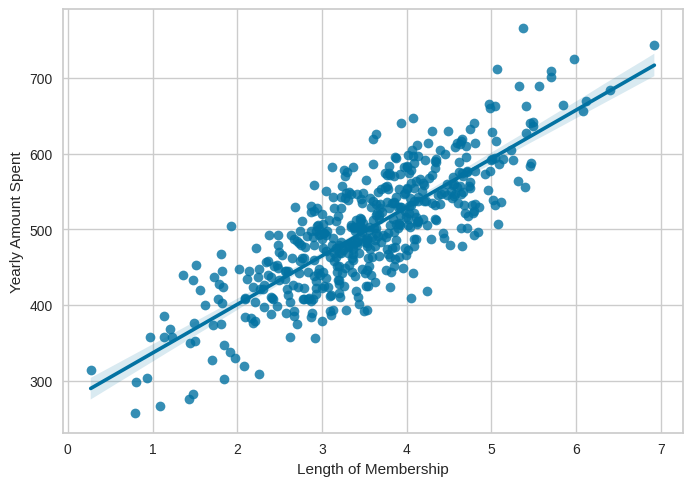

In [19]:
sns.regplot(x='Length of Membership',y='Yearly Amount Spent',data=df)
plt.show()


Yearly amount spent is linearly dependent on Membership

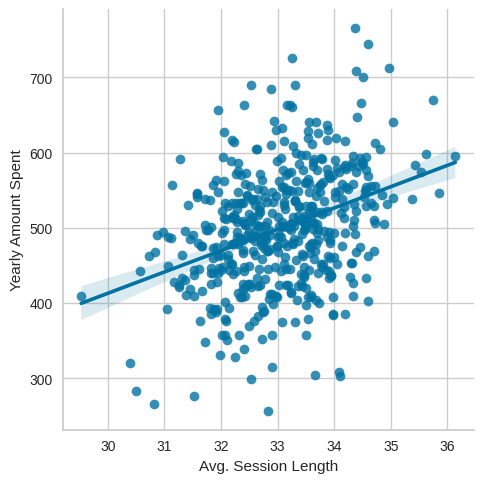

In [20]:
sns.lmplot(x='Avg. Session Length',y='Yearly Amount Spent',data=df)
plt.show()

In [21]:
# Yearly amount Spent has also dependent on Session Length

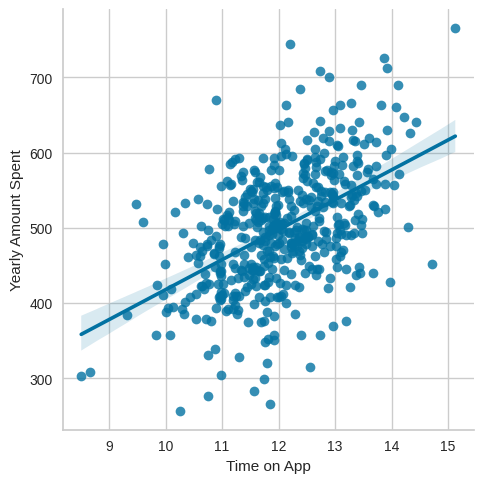

In [22]:
sns.lmplot(x='Time on App',y='Yearly Amount Spent',data=df)
plt.show()

In [23]:
# Yearly amount spent has significant dependence on Time spent on Apps.

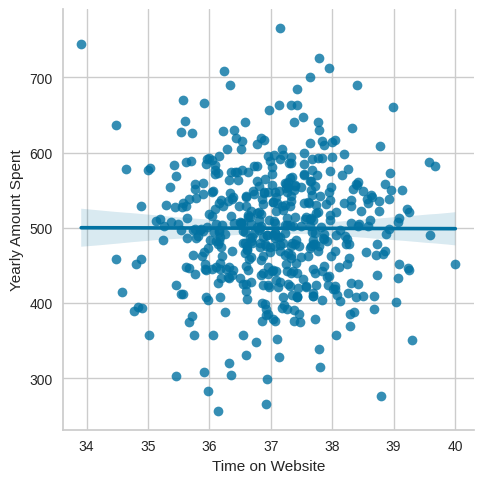

In [24]:
sns.lmplot(x='Time on Website',y='Yearly Amount Spent',data=df)
plt.show()

# CORRELATION ANALYSIS

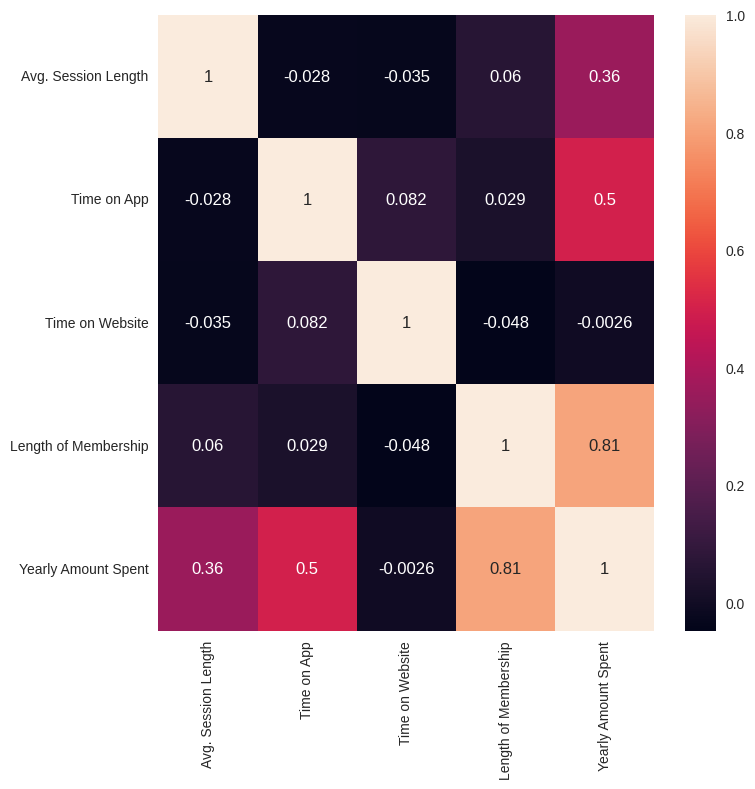

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

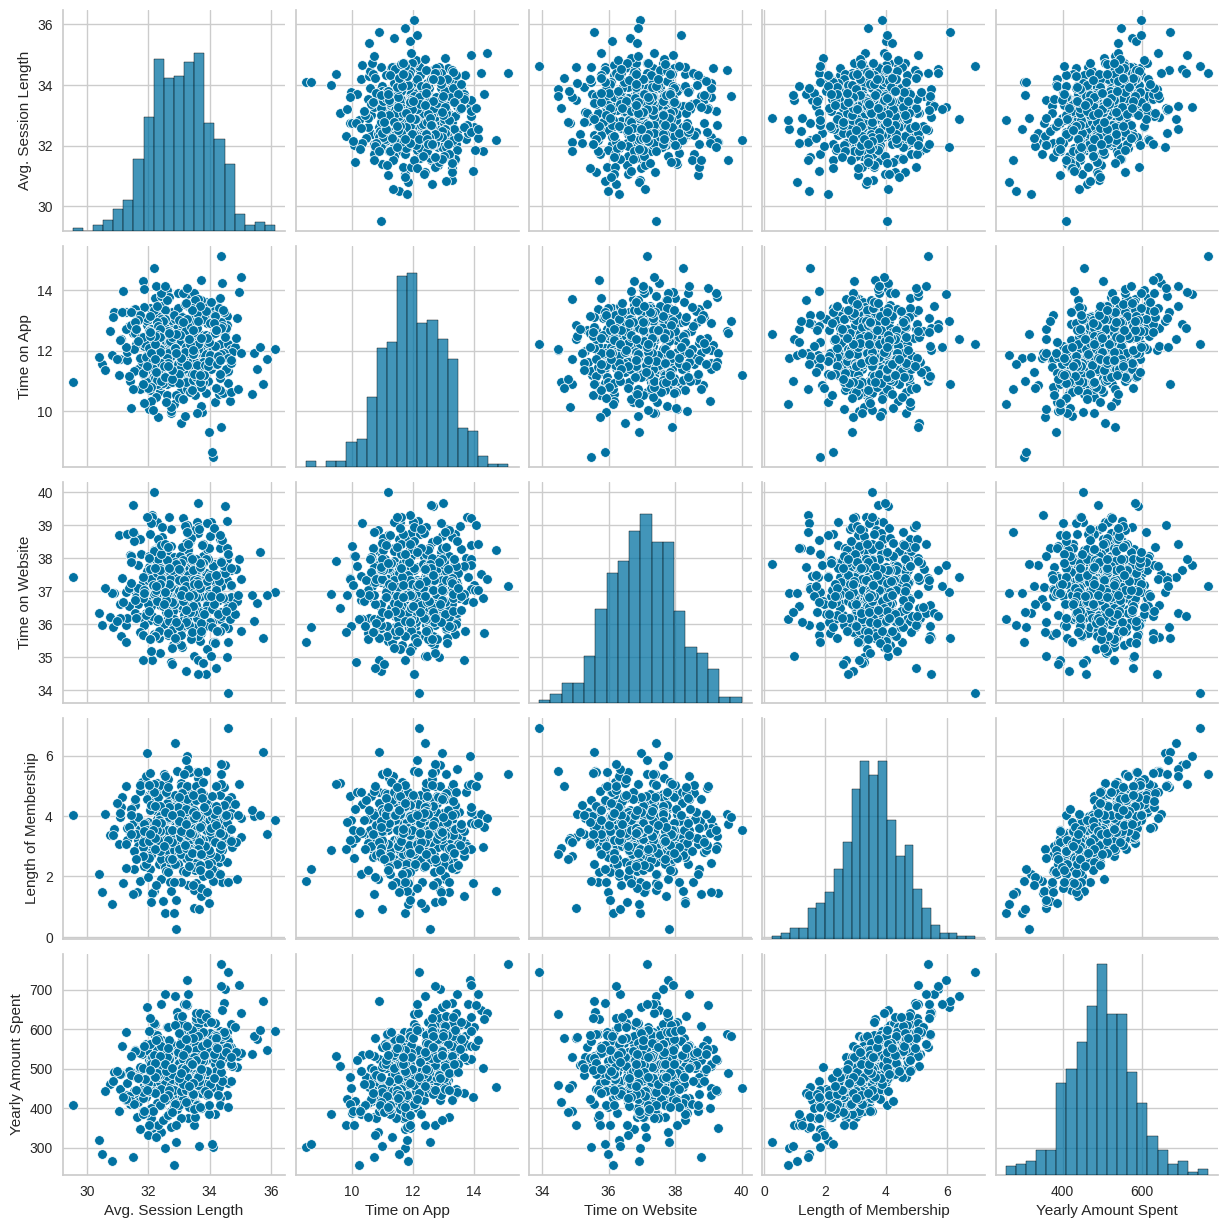

In [26]:
sns.pairplot(df)
plt.show()

# Prediction

In [27]:
setup(data=df,target="Yearly Amount Spent")

,Description,Value
0,Session id,3708
1,Target,Yearly Amount Spent
2,Target type,Regression
3,Original data shape,"(500, 6)"
4,Transformed data shape,"(500, 6)"
5,Transformed train set shape,"(350, 6)"
6,Transformed test set shape,"(150, 6)"
7,Numeric features,4
8,Categorical features,1
9,Preprocess,True


In [28]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,7.8284,95.4857,9.7226,0.9844,0.0202,0.0161,0.5490
ridge,Ridge Regression,7.8271,95.5566,9.7268,0.9844,0.0202,0.0161,0.1000
br,Bayesian Ridge,7.8277,95.4876,9.7227,0.9844,0.0202,0.0161,0.1020
lasso,Lasso Regression,7.9202,98.2488,9.8592,0.9840,0.0206,0.0164,0.1000
llar,Lasso Least Angle Regression,7.9202,98.2488,9.8592,0.9840,0.0206,0.0164,0.1090
lar,Least Angle Regression,9.3645,147.4808,11.5600,0.9769,0.0251,0.0196,0.2120
et,Extra Trees Regressor,12.3547,281.3142,16.3393,0.9561,0.0356,0.0261,0.3550
gbr,Gradient Boosting Regressor,13.0698,294.3060,16.9026,0.9526,0.0366,0.0274,0.2840
xgboost,Extreme Gradient Boosting,13.7702,345.4799,18.2927,0.9441,0.0389,0.0287,0.4000
lightgbm,Light Gradient Boosting Machine,13.9691,375.3924,19.1571,0.9392,0.0434,0.0299,0.2270


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

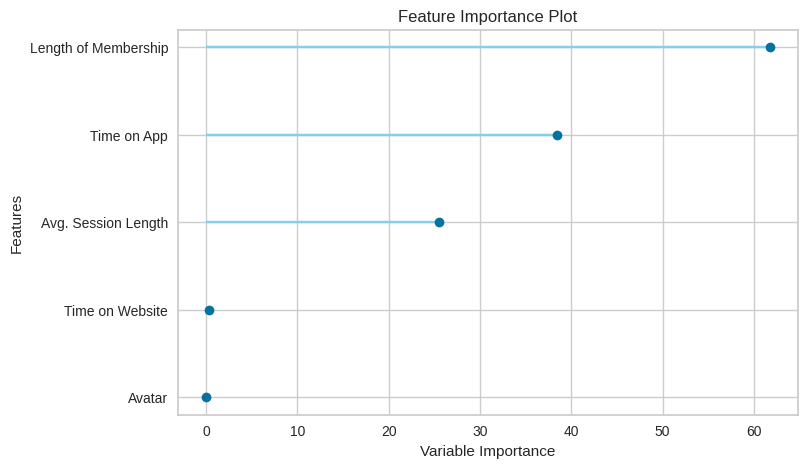

In [30]:
plot_model(estimator=best_model,plot='feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

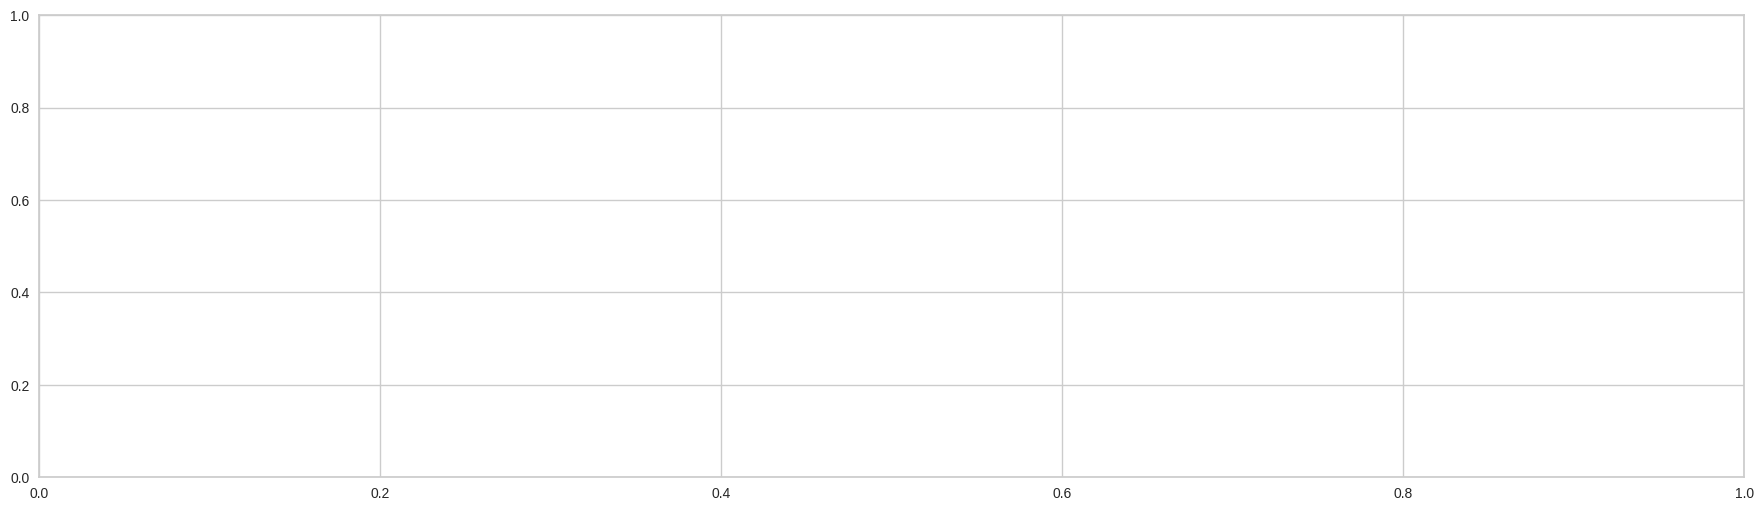

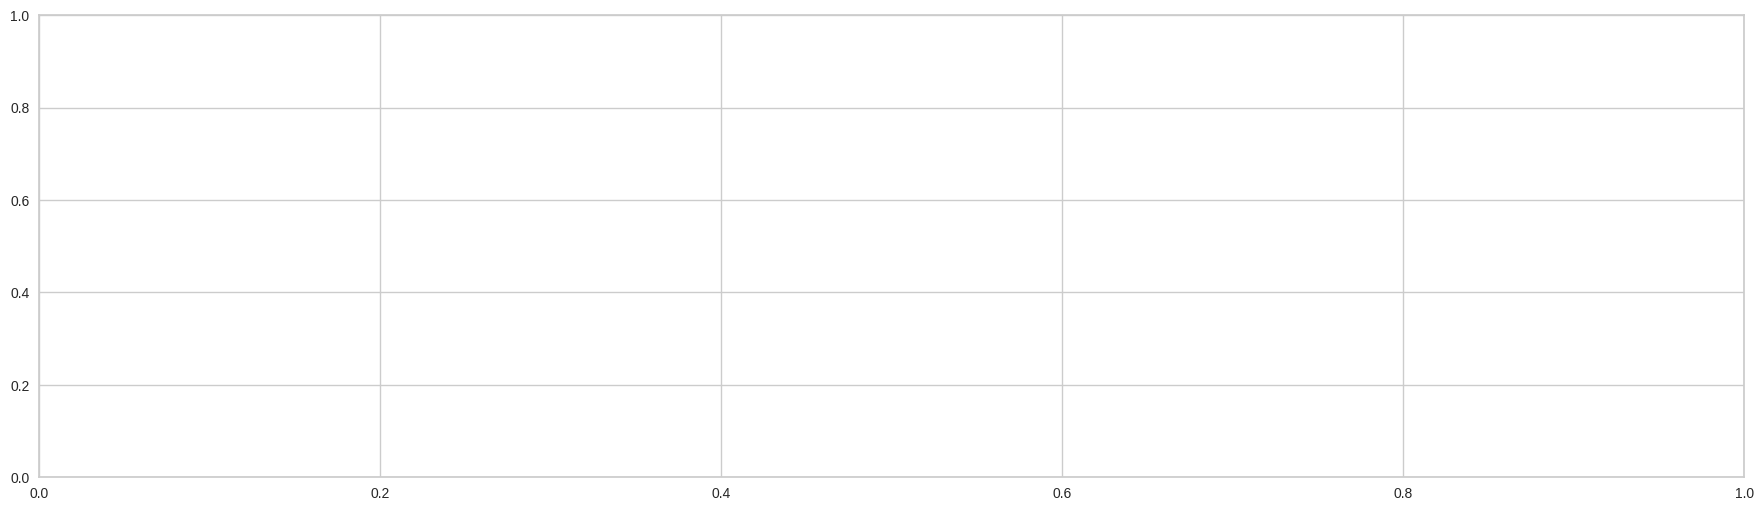

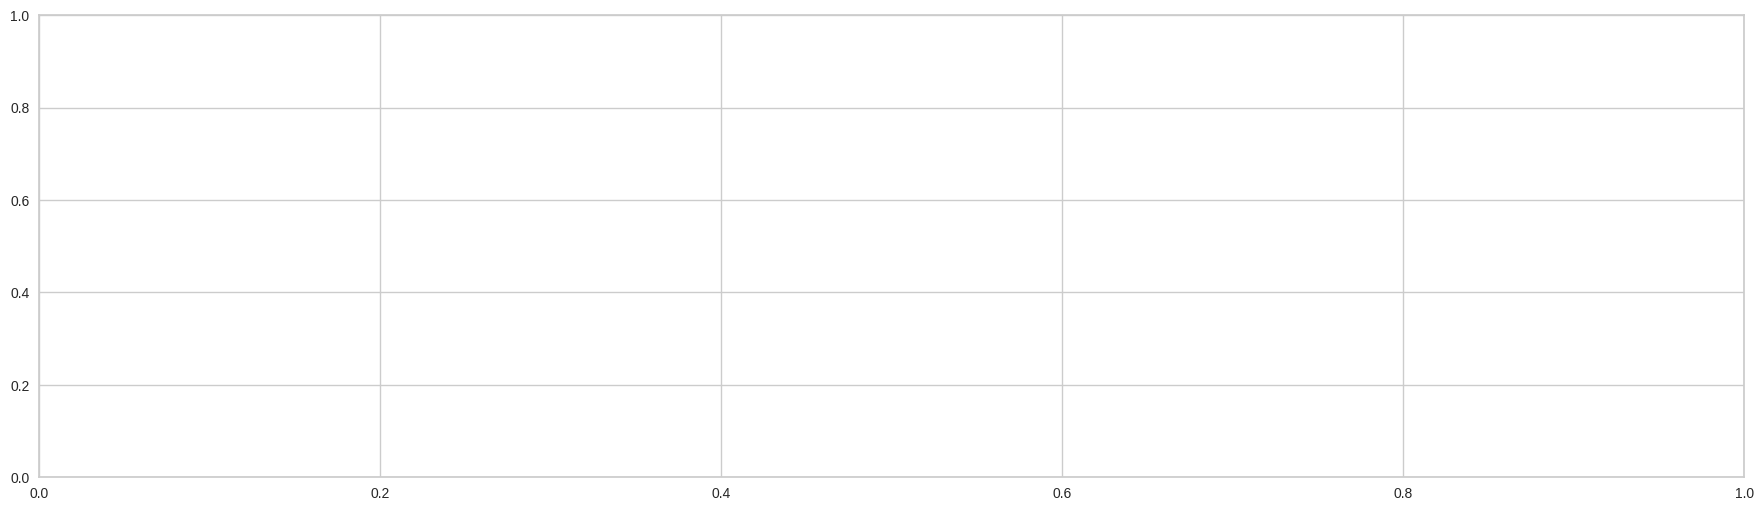

In [31]:
evaluate_model(best_model)

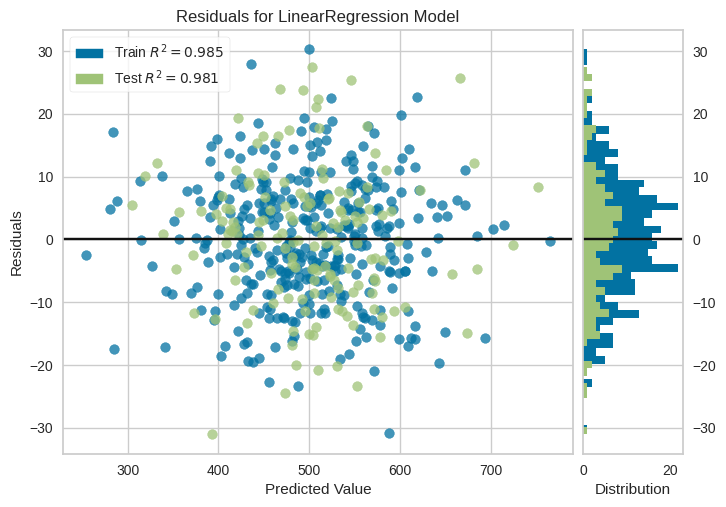

In [32]:
plot_model(best_model)

Linear Regression model performs well with accuracy of 98.5% folllowed by Least Angle Regression, Ridge Regression and Bayesian Ridge.

In [33]:
model=create_model('lr',cross_validation=True,fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.4724,94.5646,9.7244,0.9850,0.0196,0.0151
1,7.6930,84.2430,9.1784,0.9859,0.0202,0.0167
2,9.2162,129.5222,11.3808,0.9813,0.0231,0.0186
3,7.6274,84.7979,9.2086,0.9873,0.0179,0.0149
4,7.3561,82.8902,9.1044,0.9797,0.0176,0.0143
5,8.1776,100.1736,10.0087,0.9878,0.0211,0.0173
6,7.3581,83.1696,9.1197,0.9863,0.0195,0.0155
7,6.5523,66.3416,8.1450,0.9847,0.0165,0.0132
8,8.6897,130.5659,11.4265,0.9840,0.0262,0.0196


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [34]:
tuned_model=tune_model(model,optimize='RMSE',fold=10,n_iter=20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.4724,94.5646,9.7244,0.9850,0.0196,0.0151
1,7.6930,84.2430,9.1784,0.9859,0.0202,0.0167
2,9.2162,129.5222,11.3808,0.9813,0.0231,0.0186
3,7.6274,84.7979,9.2086,0.9873,0.0179,0.0149
4,7.3561,82.8902,9.1044,0.9797,0.0176,0.0143
5,8.1776,100.1736,10.0087,0.9878,0.0211,0.0173
6,7.3581,83.1696,9.1197,0.9863,0.0195,0.0155
7,6.5523,66.3416,8.1450,0.9847,0.0165,0.0132
8,8.6897,130.5659,11.4265,0.9840,0.0262,0.0196


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


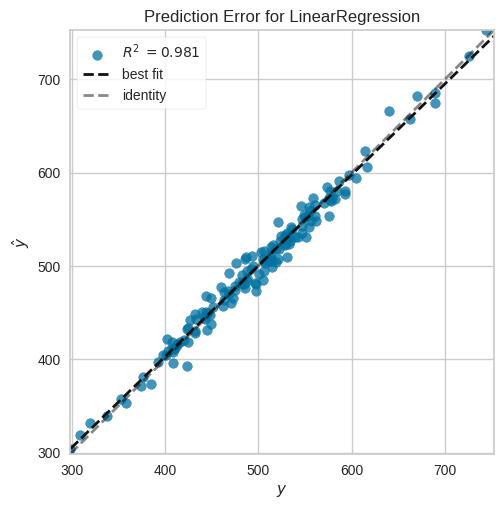

In [35]:
plot_model(tuned_model,plot='error')